<a href="https://colab.research.google.com/github/Sulphite05/ReinforcementLearning/blob/main/transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformers

In [ ]:
from google.colab import drive
from IPython.display import Image

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from transformers import pipeline

The pipeline function --> most high-level API of transformers library <br/>
- end-to-end object from raw text to usable predictions
- includes all pre-processing (text to numbers)
- and post-processing (numbers to text)

In [ ]:
classifier1 = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")
classifier1(["I've been waiting my whole life to be with you!",
           "The OS is the manager of the computer system.",
           "What is wrong with you?",
           "Are you okay?"])

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9984979629516602},
 {'label': 'NEGATIVE', 'score': 0.9084308743476868},
 {'label': 'NEGATIVE', 'score': 0.9990400671958923},
 {'label': 'POSITIVE', 'score': 0.998790442943573}]

In [ ]:
classifier2 = pipeline("zero-shot-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", trust_remote_code=True)
classifier2("Shehbaz Sharif is the PM of Pakitan.",
           candidate_labels=["education", "politics", "business"])

Device set to use cpu
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


{'sequence': 'Shehbaz Sharif is the PM of Pakitan.',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.47259363532066345, 0.294681578874588, 0.23272478580474854]}

In [ ]:
generator = pipeline("text-generation", model="openai-community/gpt2") # initial objective of gpt
generator("In this notebook, we will", max_length=20, num_return_sequences=2)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this notebook, we will write down the process, for each application, how and when the service'},
 {'generated_text': 'In this notebook, we will explain how you can access your data and gain access to the information you'}]

In [ ]:
generator = pipeline("fill-mask", model="distilbert/distilroberta-base") # initial objective of bert
generator("In this notebook, we will learn <mask> computation", top_k=3)

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


[{'score': 0.22510744631290436,
  'token': 17997,
  'token_str': ' quantum',
  'sequence': 'In this notebook, we will learn quantum computation'},
 {'score': 0.03392070159316063,
  'token': 47713,
  'token_str': ' asynchronous',
  'sequence': 'In this notebook, we will learn asynchronous computation'},
 {'score': 0.020953776314854622,
  'token': 37920,
  'token_str': ' numerical',
  'sequence': 'In this notebook, we will learn numerical computation'}]

In [ ]:
ner = pipeline("ner", grouped_entities=True, model="dbmdz/bert-large-cased-finetuned-conll03-english")
ner("My name is Harris. I am a software engineer at Apple Inc.")

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9988734,
  'word': 'Harris',
  'start': 11,
  'end': 17},
 {'entity_group': 'ORG',
  'score': 0.99913627,
  'word': 'Apple Inc',
  'start': 47,
  'end': 56}]

In [ ]:
answerer = pipeline("question-answering", model="distilbert/distilbert-base-cased-distilled-squad")
answerer(question="Who am I?",
         context="The sky is blue and I am Aqiba.")

Device set to use cpu


{'score': 0.9811325669288635, 'start': 25, 'end': 30, 'answer': 'Aqiba'}

In [ ]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
summarizer("""The Trojan War was a legendary conflict in Greek mythology
           that took place around the 12th or 13th century BC.
           The war was waged by the Achaeans (Greeks) against the city of
           Troy after Paris of Troy took Helen from her husband Menelaus,
           king of Sparta. The war is one of the most important events in Greek
           mythology, and it has been narrated through many works of Greek
           literature, most notably Homer's Iliad. The core of the Iliad
           (Books II – XXIII) describes a period of four days and two nights
           in the tenth year of the decade-long siege of Troy; the Odyssey
           describes the journey home of Odysseus, one of the war's heroes.
           Other parts of the war are described in a cycle of epic poems,
           which have survived through fragments. Episodes from the war provided
           material for Greek tragedy and other works of Greek literature,
           and for Roman poets including Virgil and Ovid. The ancient Greeks
           believed that Troy was located near the Dardanelles and that
           the Trojan War was a historical event of the 13th or 12th century
           BC. By the mid-19th century AD, both the war and the city were
           widely seen as non-historical, but in 1868, the German archaeologist
           Heinrich Schliemann met Frank Calvert, who convinced Schliemann
           that Troy was at what is now Hisarlık in modern-day Turkey. On
           the basis of excavations conducted by Schliemann and others,
           this claim is now accepted by most scholars.""")

Device set to use cpu


[{'summary_text': ' The Trojan War was a legendary conflict in Greek mythology that took place around the 12th or 13th century BC . The war was waged by the Achaeans (Greeks) against the city of Troy after Paris of Troy took Helen from her husband Menelaus, the king of Sparta . The core of the Iliad describes a period of four days and two nights in the tenth year of the decade-long siege of Troy; the Odyssey describes the journey home of Odysseus .'}]

In [ ]:
translator = pipeline("translation", model="abdulwaheed1/urdu_to_english_translation_mbart", src_lang="ur_PK", tgt_lang="en_XX")
translator("کیا نام ہے آپ کا؟")

Device set to use cpu


[{'translation_text': 'what is your name ?'}]

Transformers are language models. This means they are trained on large amount of raw text in self-supervised fashion without human intervention.<br/>
This way the model gets a statistical understanding of the language it has been trained on but it's not useful for practical tasks. Therefore the model now has to go through transfer learning in which the model is fine-tuned in a supervised way, using human-annotated labels on a given task.<br/><br/>
An example of a task is predicting the next word in a sentence having read the n previous words. This is called causal language modeling because the output depends on the past and present inputs, but not the future ones.<br/>
Another example is masked language modeling, in which the model predicts a masked word in the sentence.<br/>
There are roughly of three types:
- GPT-like (also called auto-regressive Transformer models)
- BERT-like (also called auto-encoding Transformer models)
- BART/T5-like (also called sequence-to-sequence Transformer models)

Pre training is done on large amount of data with randomly initialised weights. It involves a lot of computing power, energy, carbon emission and money.

After pre training of the model, fine-tuning is done as per data acccording to your task. The pre trained learning is 'transferred' during the fine-tuning process. So there is no need to train the model from scratch effectively reducing computation power and cost.

# The Transformer Architecture

## 1. The Encoder
Encoder receives input and builds a representation of its features. This means the model is optimised to acquire understanding of the input.
e.g. encoder-only models like sentence classification, named entity recognition etc.

## 2. The Decoder
The decoder uses encoder's representation along with inputs to generate a target sequence so now the model is optimised for generating outputs.
e.g. generative tasks like text generation

Encoder-decoder models or sequence-to-sequence models are good for generative tasks that require an input such as translation or summarisation.

## Attention Layers

This layer tells the model to pay specific attention to certain words in the sentence. It was initially developed for translation as in some languages, in order to translate one word, you need to pay attention to some other word in the sentence to fully understand the context.

The Transformer architecture was originally designed for translation. During training, the encoder receives inputs (sentences) in a certain language, while the decoder receives the same sentences in the desired target language.

In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

- Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
- Checkpoints: These are the weights that will be loaded in a given architecture.<br/><br/>
For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”

### Encoder Only Models
At each stage of the encoder region of the transformer architecture, the attention layers can access all the words in the given sentence. They have bidirectional attention and are often termed as auto-encoding models.
Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

Representatives of this family of models include:

- ALBERT
- BERT
- DistilBERT
- ELECTRA
- RoBERTa

The numerical representaion of each token in the sentence is also called the feature vector/tensor.

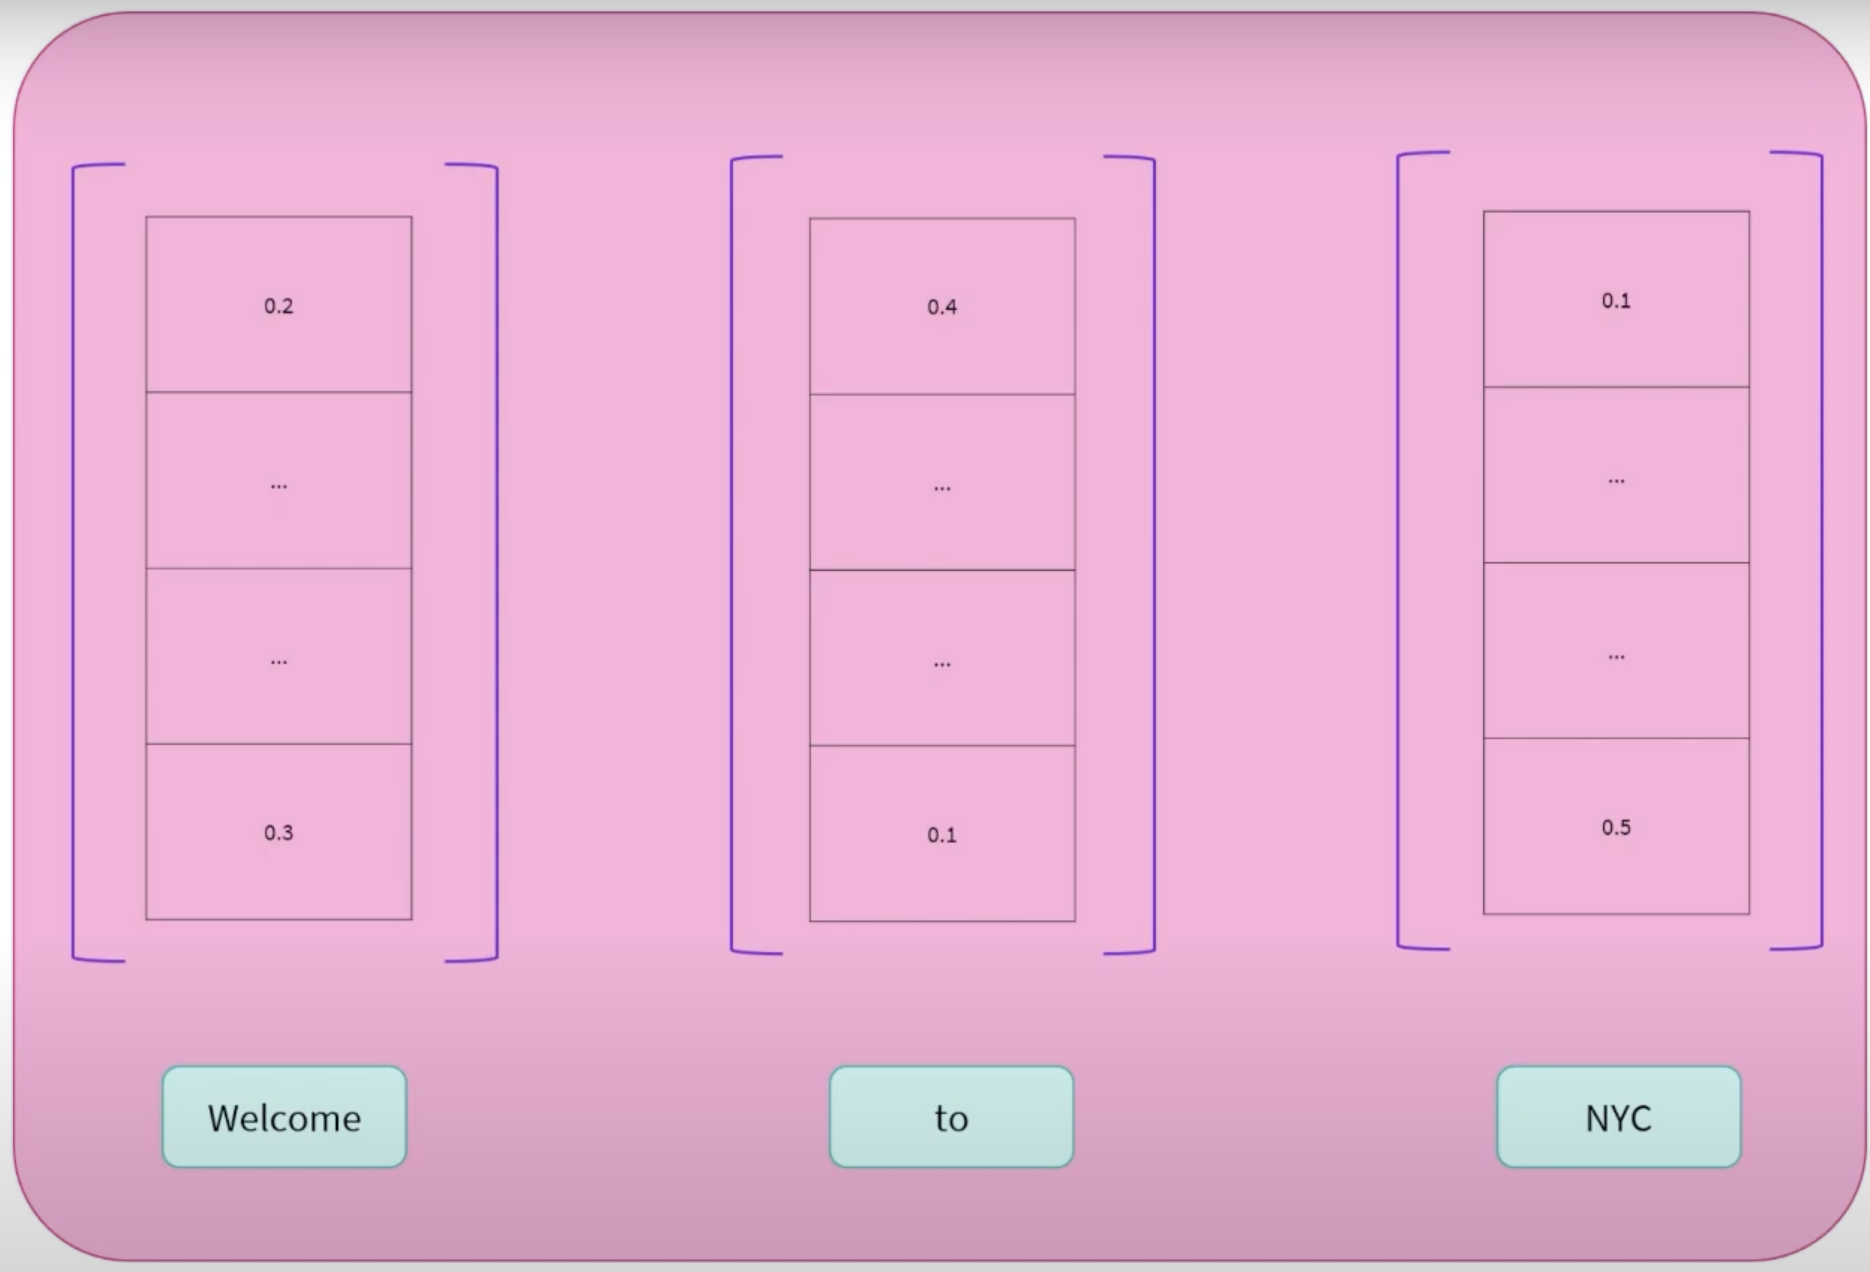

In [ ]:
Image("gdrive/MyDrive/Colab Notebooks/images/feature_vectors.png")

Dimension of the vector is defined by the architecture of the model. For the base BERT, it is 768. The vector holds the meaning of the word with the text(along with the context from left and right) using self-attention mechanism.

Two main characteristics include:
- Self-attention
- Bi-directional context

### Decoder-Only Models

They can be used for most of the same tasks as encoders with generally, a little loss of performance. Here again we convert the words into a feature vector. It's distinction from the encoder lies in the fact that it uses masked self-attention. The words on the right are not included in the current word's context. They have access to only one direction of the context. The left or the right. This is why they are good for causal language modelling.

In causal language modelling, initially a word is given for instance 'My' whose feature vector is developed. Now a small transformation is applied to this vector so that it maps to all the words known by the model(also called language modelling head). Now the word with highest probability is selected. Now the new word for instance "name" is added to the initial sequence. This is the autoregressive concept which means reusing past outputs as inputs in following steps. This is repeated upto a particular context size. The context size of base GPT is 1024 means it could retain the context of last 1024 words only.

Some features of decoder-only models are:
- uni-directional context
- Auto regressive
- Masked self-attention + Cross-Attention

### Sequence to sequence model

An example of it is T5. The outputs of encoder(holding meaning of the sequence of words) are directly passed to the decoder along with the usual inputs of the decoder. Now the decoder tries to decode the input of the encoder for the initial word. Now the encoder inputs are no longer needed and the generated output is added to the inputs for the decoder

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

# Model Bias

In [6]:
unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("He works as a [MASK].")
print([r['token_str'] for r in result])
result = unmasker("She works as a [MASK].")
print([r['token_str'] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


['lawyer', 'farmer', 'teacher', 'journalist', 'businessman']
['teacher', 'model', 'journalist', 'lawyer', 'nurse']


# The Transformers Library

- In order to facilitate the use of new models being released everyday, the transformers library was created to provide a single API through which models could be loaded, trained and saved.
- It enables ease of use, simplicity(Single file definitions for a model. No complicated abstraction layers) and flexibility(all models are simple PyTorch nn.Module or TensorFlow tf.keras.Model classes)

## What happens inside the pipeline library?

Let's focus on sentimental analysis.

The flow is as follows: <br/><br/>
Tokenizer -> Model -> Postprocessing <br/><br/>
The raw text is converted to numbers. The numbers are sent to a model which outputs logits. The post-processing steps convert these logits to predictions(labels and scores).

### Tokenization
1. The text is divided into tokens.
2. The the tokenizer adds some special tokens if the model needs them. Such as adding [CLS] token at the beginning and [SEP] token at the end of the sentence to classify.
3. The tokens are then mapped to their unique IDs by the tokenizer. We can do the same using the AutoTokenizer API provided by the Transformers library.

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint) # it downloads and caches the vocabulary associated with the given checkpoint

raw_inputs = ["I've been waiting for someone like you my whole life.",
              "I don't believe any of you!"]


In [ ]:
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
# padding is used since the size of both sentences isn't the same.
# truncation makes sure any sentence longer tha what the model expected can be truncated.
# pt tells the tokeniser to return a pytorch tensor.
inputs

{'input_ids': tensor([[ 101, 1045, 1005, 2310, 2042, 3403, 2005, 2619, 2066, 2017, 2026, 2878,
         2166, 1012,  102],
        [ 101, 1045, 2123, 1005, 1056, 2903, 2151, 1997, 2017,  999,  102,    0,
            0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

The areas with 0 are padded.

### The Model

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint) # it will download and cache the configuration of the model as well as
# the pretrained weights
# However, the automodel API only instantiates the body of the model which the part of the model that is left once the
# pretraining head is removed
# it will output a high-dimensional tensor/vector which is a representation of the sentences passed but is not directly
# useful for our classification problem.
outputs = model(**inputs)


In [ ]:
outputs.last_hidden_state.shape

torch.Size([2, 15, 768])

Here 768 is the hidden size of our tensor.

To get an output linked to our classification problem, we do the following.

In [ ]:
from transformers import AutoModelForSequenceClassification
# It is like AutoModel class except that it will build a model with a classification head.
# There is one Auto class for each common NLP task in the transformers library.

model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs.logits)


tensor([[-3.2463,  3.3436],
        [ 4.2155, -3.3855]], grad_fn=<AddmmBackward0>)


Here, we get one result for each sentence and for each possible label.
They are not probabilities yet as they are logits.

### Postprocessing

To convert logits to probabilities, we apply softmax to them. This transforms them to positive numbers that sum up to one.

In [ ]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions

tensor([[1.3722e-03, 9.9863e-01],
        [9.9950e-01, 4.9975e-04]], grad_fn=<SoftmaxBackward0>)

In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

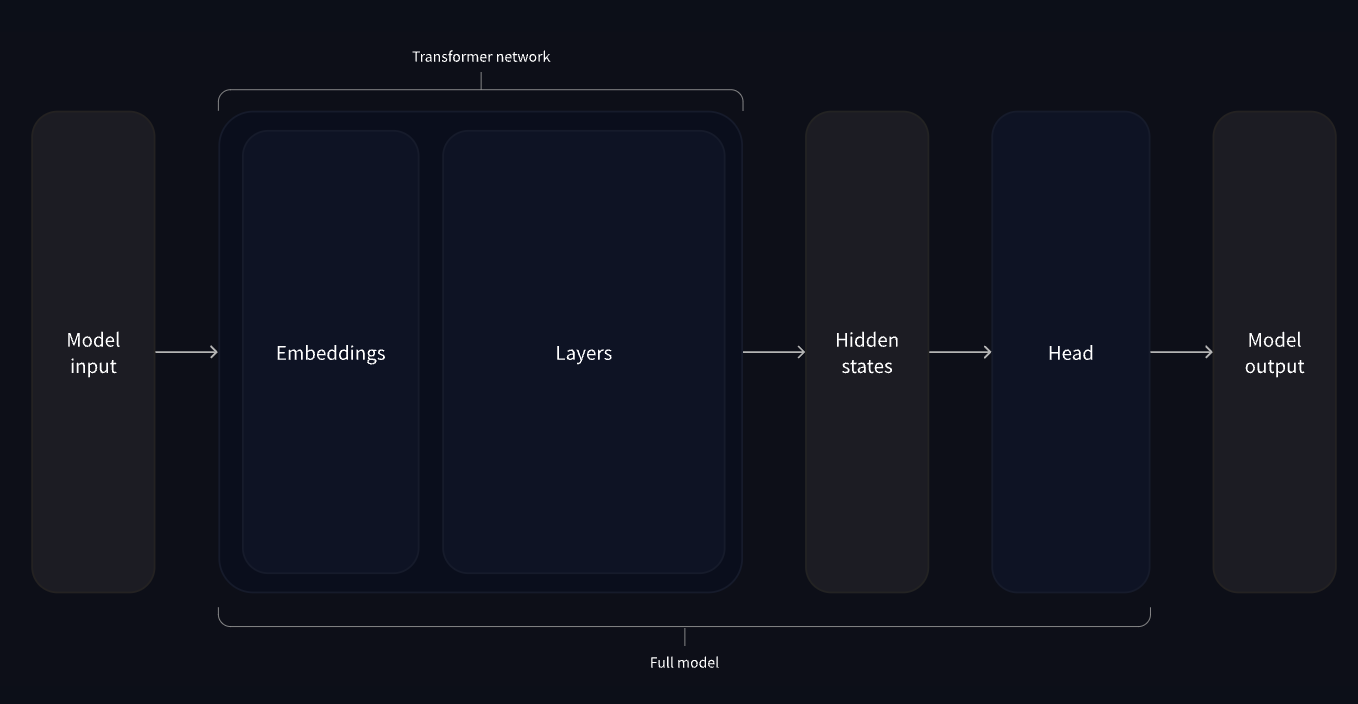

In [ ]:
Image("gdrive/MyDrive/Colab Notebooks/images/pipeline.png")

In [ ]:
predictions * 100

tensor([[1.3722e-01, 9.9863e+01],
        [9.9950e+01, 4.9975e-02]], grad_fn=<MulBackward0>)

## MODELS

AutoModel class allows you to instantiate a pretrained model from any checkpoint on the HF Hub. It picks the right model class from the library to instantiate the proper architecture and load the weights of the pretrained model inside it.

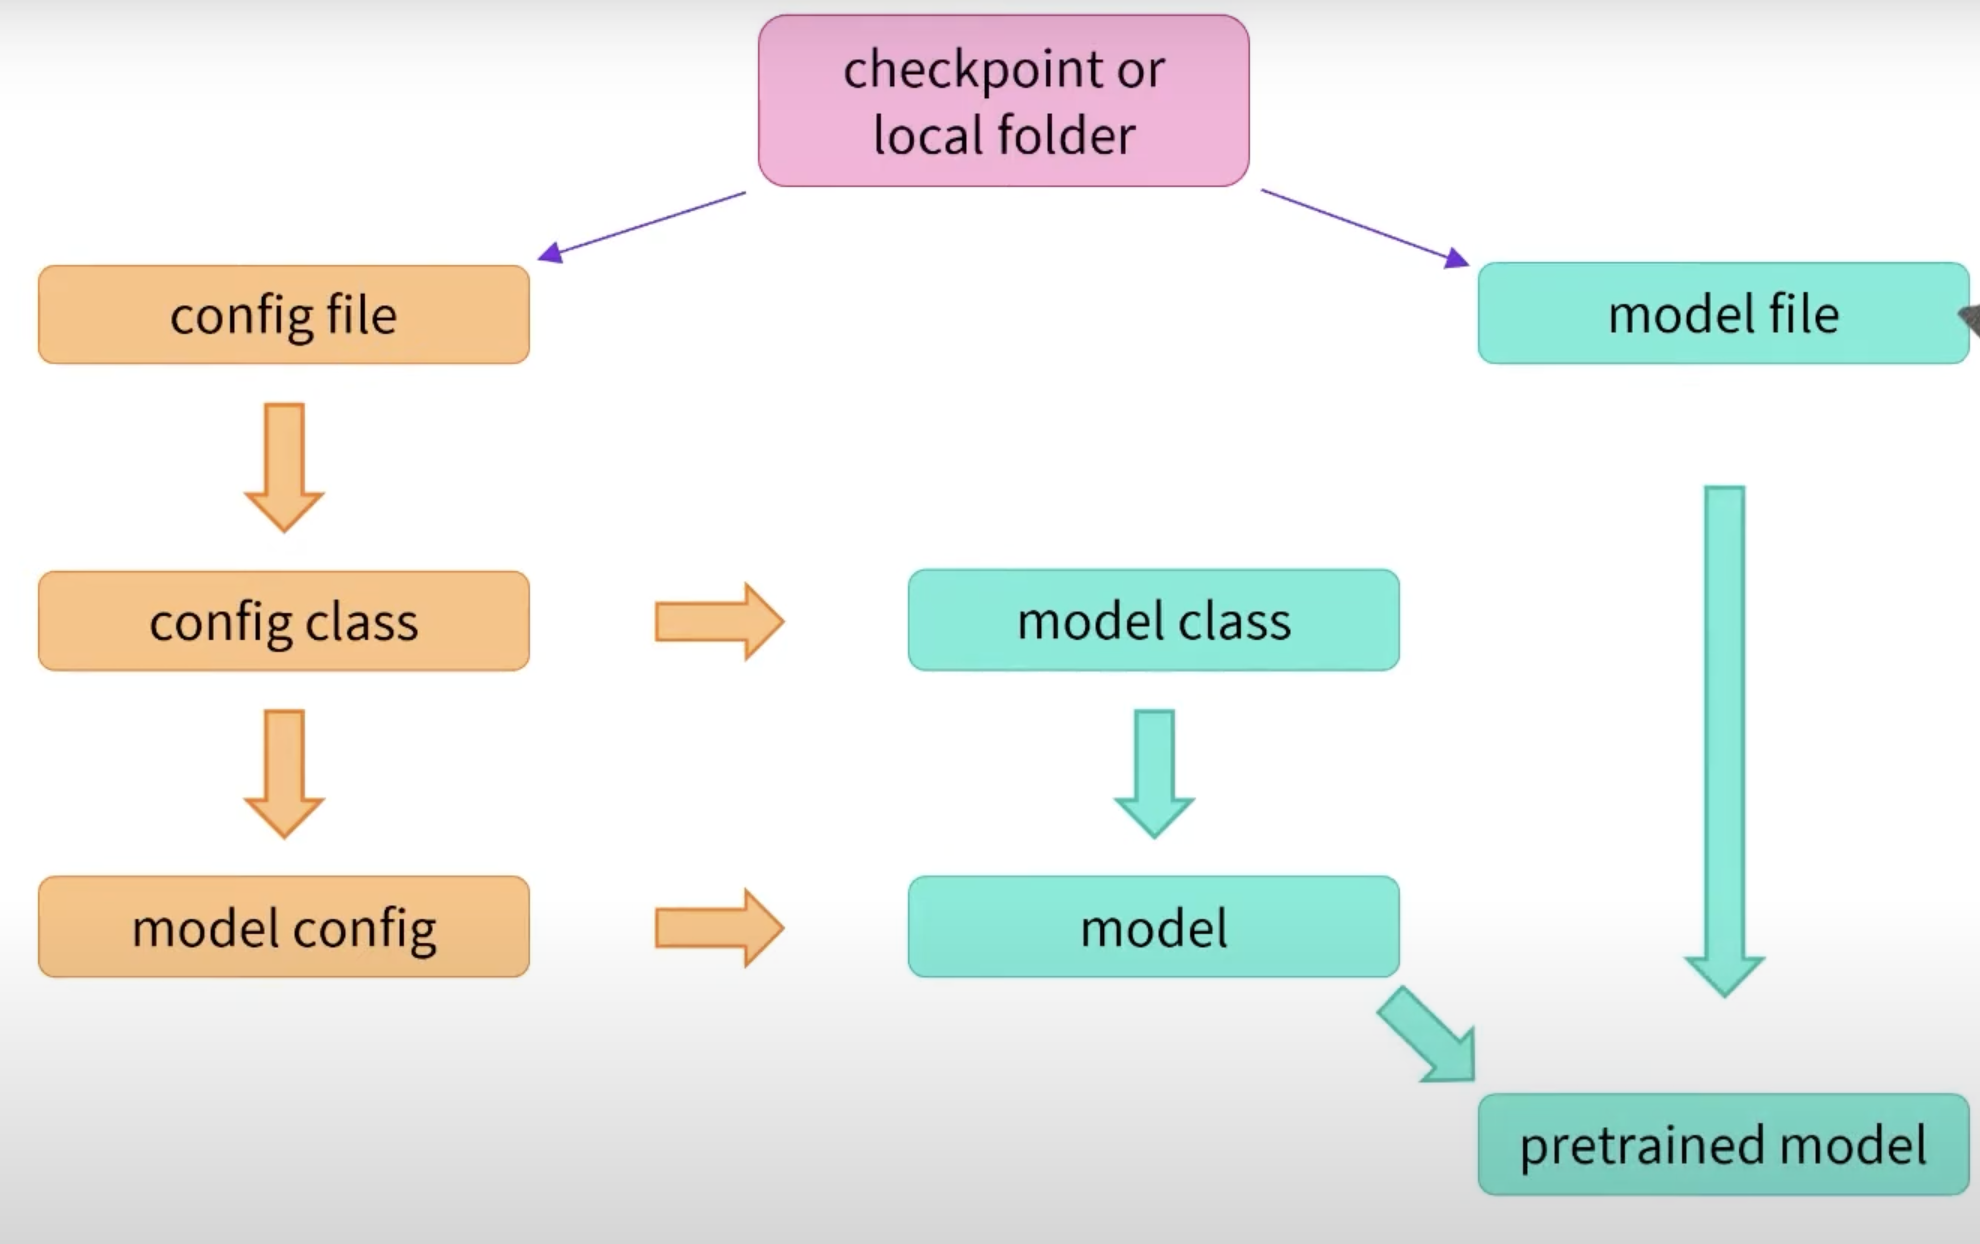

In [ ]:
Image("gdrive/MyDrive/Colab Notebooks/images/model_files.png")

## Creating a transformer



In [9]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

In [10]:
config # a randomly initialised model; will output gibberish. So we use pretrained models to save time

BertConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.48.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [11]:
from transformers import BertModel # can be replaced by AutoModel to produce checkpoint-agnostic code.

model = BertModel.from_pretrained("bert-base-cased") # give input a checkpoint

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [14]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")
# model.save_pretrained("directory_on_my_computer")
# This saves two files:
# - config.json (attributes to build model architecture and some metadata)
# - pytorch_model.bin holds state dictionary(model weights)